## Importing Module

In [14]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## Loading Model

In [15]:
model = tf.keras.models.load_model('trained_model.keras')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

## Visualizing Single Image of Test Set

In [19]:
import cv2
image_path = "test/AppleScab1.JPG"

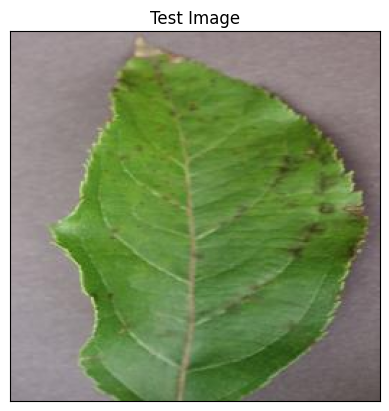

In [20]:
#Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#Displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [21]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [22]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 0s 425ms/step


(array([[9.74551618e-01, 7.18168521e-05, 2.53994058e-05, 3.79173318e-03,
         1.37991685e-06, 1.00215511e-05, 1.90608233e-04, 6.58497011e-05,
         5.68485257e-06, 1.32739355e-04, 3.29859154e-06, 8.53382346e-07,
         9.55266355e-09, 1.93976234e-07, 8.88562005e-04, 1.05557200e-02,
         3.67620075e-03, 3.99740975e-06, 2.47751042e-04, 1.90910487e-03,
         4.61381705e-06, 2.28103709e-05, 1.78503187e-03, 3.91010923e-04,
         3.23951477e-04, 6.47552952e-04, 7.46988007e-05, 5.37951360e-04,
         1.22768815e-05, 4.99061025e-06, 6.23909784e-07, 2.25983044e-07,
         4.58413961e-05, 1.00982916e-07, 1.06821899e-05, 3.87571760e-07,
         1.14462848e-08, 4.66472284e-06]], dtype=float32),
 (1, 38))

In [23]:
result_index = np.argmax(prediction)
result_index

0

In [24]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

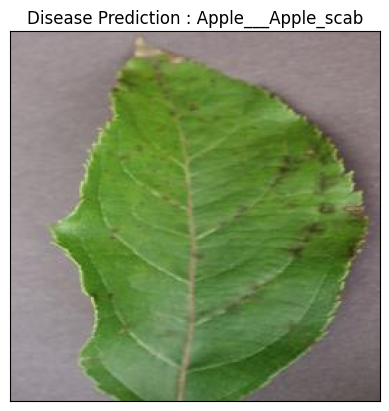

In [25]:
#Displaying Result of disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Prediction : {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()